In [45]:
# basic
import numpy as np
import pandas as pd
from IPython.display import display
import sys
import os
sys.path.append('../../utils')

In [46]:
# visualization
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

In [47]:
# utils libs
from process import *

In [48]:
## Creating an object
SIZE = 160
%time ip = ImagePrec(path = '../../data/train',size=SIZE, channel=3, normalize=True, augment=True)


## Generating training batch for the training process
%time train = ip.get_batch_data(expand=4, seed=17)
%time print train['x'].shape
%time print train['y'].shape

Extracting training image info ...
Time Usage: 55.9327690601 sec
5360 5360 5360
CPU times: user 50.8 s, sys: 6.51 s, total: 57.3 s
Wall time: 56 s
Getting cropped images ...
Time Usage: 0.145295143127 sec
CPU times: user 3.59 s, sys: 2.63 s, total: 6.22 s
Wall time: 6.01 s
(21440, 160, 160, 3)
CPU times: user 230 µs, sys: 330 µs, total: 560 µs
Wall time: 454 µs
(21440, 160, 160)
CPU times: user 125 µs, sys: 186 µs, total: 311 µs
Wall time: 240 µs


In [49]:
idx = np.array([np.random.randint(len(train['x'])) for i in range(9)])
print idx

[18966 12485 13011  1545 20617 11843 16773 12997  9947]


In [50]:
imgs = train['x'][idx]
masks = train['y'][idx]

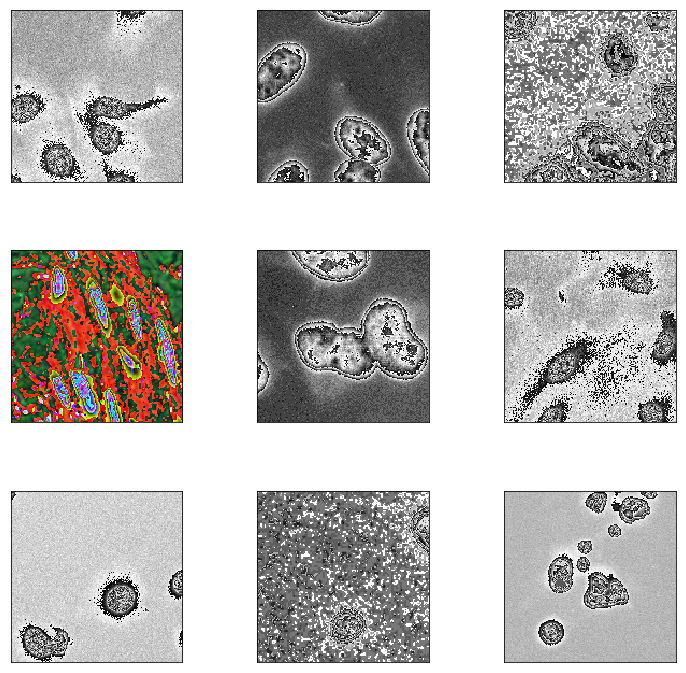

In [51]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i])
    ax.set_xticks([])
    ax.set_yticks([])

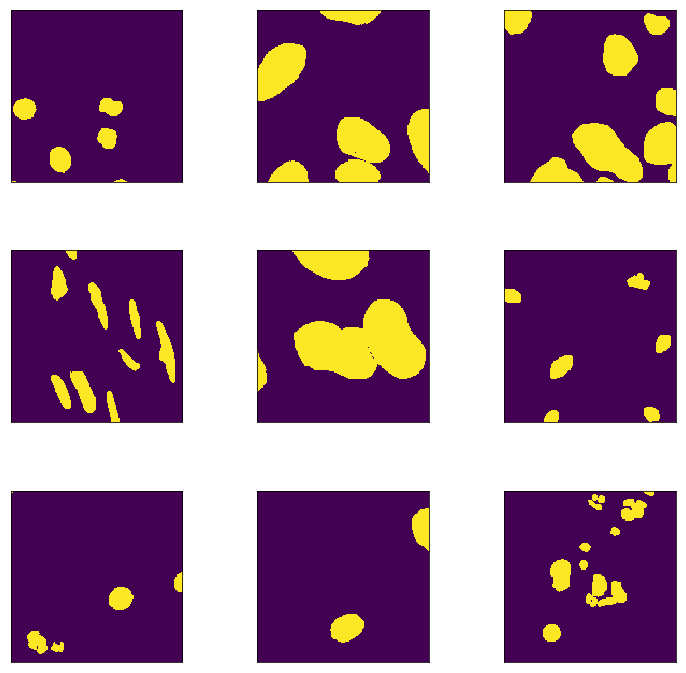

In [52]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(masks[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [53]:
print len(ip._imgs)
idx = np.array([np.random.randint(len(ip._imgs)) for i in range(9)])
imgs = [ip._imgs[i] for i in idx]
masks = [ip._masks[i] for i in idx]

5360


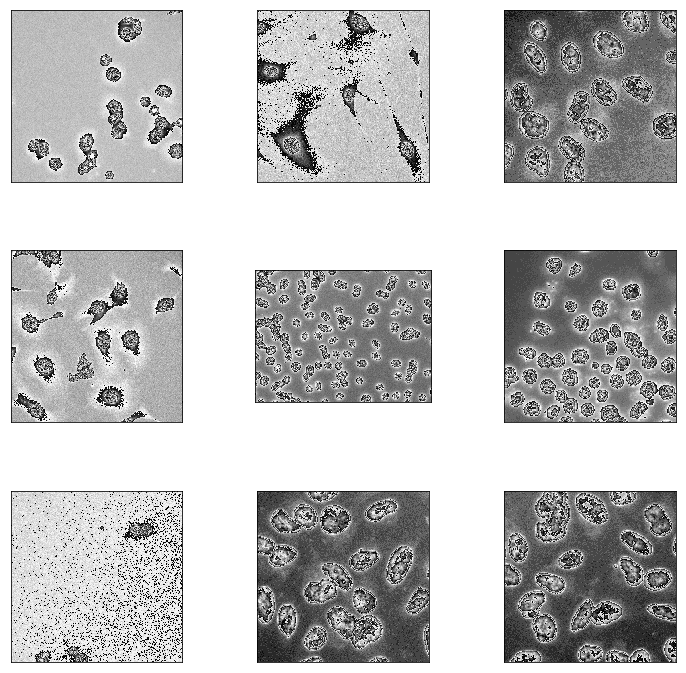

In [54]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i])
    ax.set_xticks([])
    ax.set_yticks([])

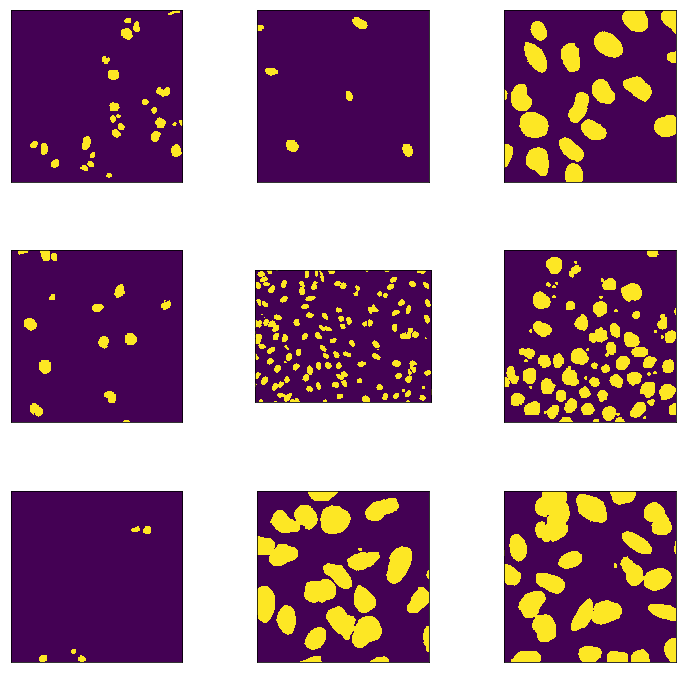

In [55]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(masks[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [56]:
# Keras
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input, Reshape
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.utils import np_utils, plot_model
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.callbacks import LearningRateScheduler
from keras import regularizers
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50

In [57]:
model = Sequential()
model.add(Conv2D(16, input_shape = (SIZE, SIZE, 3), kernel_size = (7, 7), padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.17))
model.add(Conv2D(32, kernel_size = (5, 5), padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = (5, 5), padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.36))
model.add(Conv2D(128, kernel_size = (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Conv2D(1, kernel_size = (3, 3), padding = 'same'))
model.add(Activation('sigmoid'))
model.add(Reshape((SIZE, SIZE)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 160, 160, 16)      2368      
_________________________________________________________________
activation_11 (Activation)   (None, 160, 160, 16)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 160, 160, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 160, 160, 32)      12832     
_________________________________________________________________
activation_12 (Activation)   (None, 160, 160, 32)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 160, 160, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 160, 160, 64)      51264     
__________

In [58]:
learning_rate = 0.01
optimizer = SGD(learning_rate)
loss = 'binary_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [59]:
for i in range(17):
    %time train = ip.get_batch_data(expand=8, seed=i**5)
    model.fit(train['x'], train['y'], batch_size=32, epochs=1, verbose=1)

Getting cropped images ...
Time Usage: 0.452641963959 sec
CPU times: user 9.05 s, sys: 16.7 s, total: 25.8 s
Wall time: 25.1 s
Epoch 1/1
42880/42880 [==============================] - 941s - loss: 0.1518 - acc: 0.9435   
Getting cropped images ...
Time Usage: 0.338406085968 sec
CPU times: user 7.51 s, sys: 6.9 s, total: 14.4 s
Wall time: 14.2 s
Epoch 1/1
42880/42880 [==============================] - 951s - loss: 0.1029 - acc: 0.9623   
Getting cropped images ...
Time Usage: 0.793377876282 sec
CPU times: user 8.87 s, sys: 6.68 s, total: 15.5 s
Wall time: 15.2 s
Epoch 1/1
42880/42880 [==============================] - 934s - loss: 0.0908 - acc: 0.9668   
Getting cropped images ...
Time Usage: 0.743160009384 sec
CPU times: user 7.41 s, sys: 7.31 s, total: 14.7 s
Wall time: 14.5 s
Epoch 1/1
42880/42880 [==============================] - 920s - loss: 0.0875 - acc: 0.9678   
Getting cropped images ...
Time Usage: 0.315934896469 sec
CPU times: user 8.34 s, sys: 7.43 s, total: 15.8 s
Wall tim

KeyboardInterrupt: 

In [ ]:
ip.get_test_set(path='../../data/test', normalize=True)
masks = ip.predict(model, stride=16)
sub = ip.encoding(threshold=0.5)
sub.to_csv('234.csv', index=False)

In [ ]:
print len(ip._test_imgs)
idx = np.array([np.random.randint(len(ip._test_imgs)) for i in range(9)])
imgs = [ip._test_imgs[i] for i in idx]
masks = [(ip._test_masks[i]>0.5) for i in idx]

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (12, 12))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i, ax in enumerate(axes.flat):
    ax.imshow(masks[i])
    ax.set_xticks([])
    ax.set_yticks([])